SMART FITNESS AND NUTRITION 

INTRODUCTION

This dataset captures detailed personal, nutritional, and fitness-related data for 20,000 individuals. It is designed to analyze how dietary intake, exercise routines, and body composition affect calorie burn, fitness level, and overall health performance. It can be used for predictive modeling, fitness recommendations, and personalized workout/diet planning.

The dataset integrates user demographic information, workout details, dietary composition, and calculated performance metrics. It includes health-related data (age, weight, BMI), exercise data (BPM, duration, type), and diet information (macronutrients, meal types). Additionally, several calculated fields estimate calorie balance, lean mass, and workout efficiency.

IMPORT THE NECESSARY LIBRARIES

In [1]:
# remove the warning massage
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

IMPORT DATASET

In [2]:
df=pd.read_csv("E:\Datascience\Dataset\Final_data (1).csv")

DISPLAY THE FIRST 5 ROWS OF THE DATASET

In [3]:
print(df.head())

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   
1     

DISPLAY THE LAST 5 ROWS OF THE DATASET

In [4]:
print(df.tail())

         Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
19995  46.77  Female        98.31        1.90   199.20   148.18        63.72   
19996  40.38  Female        88.12        1.87   196.18   134.18        54.04   
19997  50.31    Male        46.20        1.67   163.34   157.92        61.65   
19998  52.36    Male        44.30        1.62   179.27   121.23        60.88   
19999  29.56    Male        58.63        1.61   198.07   121.74        72.05   

       Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
19995                      0.77           761.61     Strength  ...   
19996                      1.97          2303.13     Strength  ...   
19997                      1.36          1468.80     Strength  ...   
19998                      1.41           929.75         Yoga  ...   
19999                      1.20           861.84         Yoga  ...   

       cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
19995          1882.80  

DATA CLEANING

In [5]:
print(df.isna().sum())

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [6]:
print(df.duplicated().sum())

0


In [7]:
#REMOVED COLUMNS
df.drop(['meal_name', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating',
'Sets', 'Reps', 'Benefit', 'Equipment Needed', 'Body Part', 'Type of Muscle',
'Burns Calories (per 30 min)', 'Burns Calories (per 30 min)_bc', 'BMI_calc',
'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR',
'Burns_Calories_Bin', 'sodium_mg', 'Workout', 'Difficulty Level', 'Target Muscle Group'],axis=1, inplace=True)



In [8]:
df.columns = (
    df.columns
      .str.lower()
      .str.replace(r"[()]", "", regex=True)
      .str.replace("/", "_per_", regex=False)
      .str.replace(" ", "_")
)


DATA UNDERSTANDING

In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              20000 non-null  float64
 1   gender                           20000 non-null  object 
 2   weight_kg                        20000 non-null  float64
 3   height_m                         20000 non-null  float64
 4   max_bpm                          20000 non-null  float64
 5   avg_bpm                          20000 non-null  float64
 6   resting_bpm                      20000 non-null  float64
 7   session_duration_hours           20000 non-null  float64
 8   calories_burned                  20000 non-null  float64
 9   workout_type                     20000 non-null  object 
 10  fat_percentage                   20000 non-null  float64
 11  water_intake_liters              20000 non-null  float64
 12  workout_frequency_

In [10]:
print(df.describe())

                age     weight_kg      height_m       max_bpm       avg_bpm  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      38.851453     73.898832      1.723093    179.889702    143.704306   
std       12.114580     21.173010      0.127033     11.510805     14.267688   
min       18.000000     39.180000      1.490000    159.310000    119.070000   
25%       28.170000     58.160000      1.620000    170.057500    131.220000   
50%       39.865000     70.000000      1.710000    180.140000    142.990000   
75%       49.630000     86.100000      1.800000    189.425000    156.060000   
max       59.670000    130.770000      2.010000    199.640000    169.840000   

        resting_bpm  session_duration_hours  calories_burned  fat_percentage  \
count  20000.000000            20000.000000     20000.000000    20000.000000   
mean      62.195813                1.259446      1280.109600       26.101313   
std        7.289351                0.341336     

In [11]:
print(df.dtypes)

age                                float64
gender                              object
weight_kg                          float64
height_m                           float64
max_bpm                            float64
avg_bpm                            float64
resting_bpm                        float64
session_duration_hours             float64
calories_burned                    float64
workout_type                        object
fat_percentage                     float64
water_intake_liters                float64
workout_frequency_days_per_week    float64
experience_level                   float64
bmi                                float64
daily_meals_frequency              float64
physical_exercise                  float64
carbs                              float64
proteins                           float64
fats                               float64
calories                           float64
meal_type                           object
diet_type                           object
sugar_g    

In [12]:
# 1.What are the unique Workout_Types and how many records does each workout have?
print(df['workout_type'].value_counts())

Strength    5071
Yoga        5032
HIIT        4974
Cardio      4923
Name: workout_type, dtype: int64


In [13]:
# 2 .What is the average Calories burned for each workout type?
print(df.groupby('workout_type')['calories_burned'].mean())

workout_type
Cardio      1211.544680
HIIT        1652.533209
Strength    1361.430459
Yoga         897.107216
Name: calories_burned, dtype: float64


In [14]:
# 3. How does Calories burned across different workout type categories?
print(df.groupby('workout_type')['calories_burned'].describe())

               count         mean         std     min      25%      50%  \
workout_type                                                              
Cardio        4923.0  1211.544680  386.739037  438.80   987.15  1178.13   
HIIT          4974.0  1652.533209  535.864138  603.90  1347.52  1609.30   
Strength      5071.0  1361.430459  437.385487  484.66  1111.47  1324.19   
Yoga          5032.0   897.107216  290.859756  323.11   733.79   871.93   

                    75%      max  
workout_type                      
Cardio        1372.2300  2092.01  
HIIT          1884.0575  2890.82  
Strength      1547.6150  2349.89  
Yoga          1022.4000  1569.01  


In [15]:
# 4. Which diet type occurs most frequently?
print(df['diet_type'].value_counts())

Paleo         3403
Low-Carb      3379
Vegetarian    3337
Keto          3324
Vegan         3323
Balanced      3234
Name: diet_type, dtype: int64


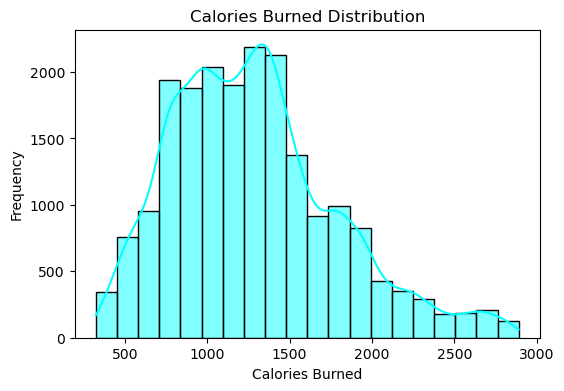

In [16]:
# 5.What is the distribution of Calories_Burned values?
plt.figure(figsize=(6,4))
sns.histplot(df['calories_burned'],bins=20,kde=True,color='cyan')
plt.title('Calories Burned Distribution')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()

In [17]:
# 6.How many records belong to each meal type category?
print(df['meal_type'].value_counts())

Lunch        5047
Dinner       5011
Breakfast    4981
Snack        4961
Name: meal_type, dtype: int64


In [18]:
# 7.For each Workout_Type, what is the average Calories_Burned when Physical exercise = Heavy?
print(df[df['physical_exercise']=='Heavy'].groupby('workout_type')['calories_burned'].mean())

Series([], Name: calories_burned, dtype: float64)


In [19]:
# 8.For each Gender,what is the average calories burned when meal type=lunch?
print(df[df['meal_type'] =='Lunch'].groupby('gender')['calories_burned'].mean())



gender
Female    1271.049968
Male      1285.248158
Name: calories_burned, dtype: float64


In [20]:
# 9. Does weight affect calories burned across records?
corr_wc = df['weight_kg'].corr(df['calories_burned'])
print("Correlation between Weight and Calories_Burned:", corr_wc)

Correlation between Weight and Calories_Burned: -0.001994200072650604


In [21]:
# 10. Which Workout_Type has the highest average Calories_Burned?
print(df.groupby('workout_type')['calories_burned'].mean().sort_values(ascending=False))


workout_type
HIIT        1652.533209
Strength    1361.430459
Cardio      1211.544680
Yoga         897.107216
Name: calories_burned, dtype: float64


In [22]:
# 11.Whatare the most common diet types among users whose Physical exercise = 'Heavy'?
print(df[df['meal_type'] == 'Lunch']['diet_type'].value_counts())


Balanced      868
Vegan         859
Paleo         843
Low-Carb      842
Keto          822
Vegetarian    813
Name: diet_type, dtype: int64


In [23]:
#12.What is the average Calories_Burned when meal_type = 'Dinner'?
print(df[df['meal_type'] == 'Dinner']['calories_burned'].mean())


1281.0516982638196


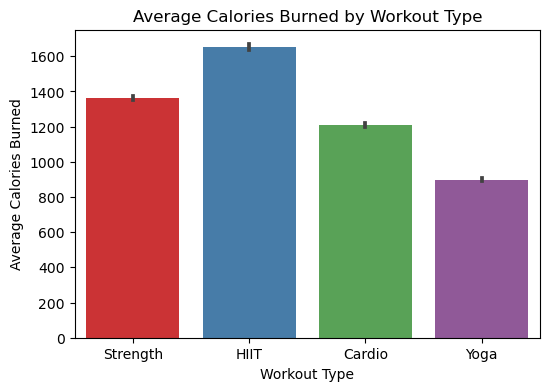

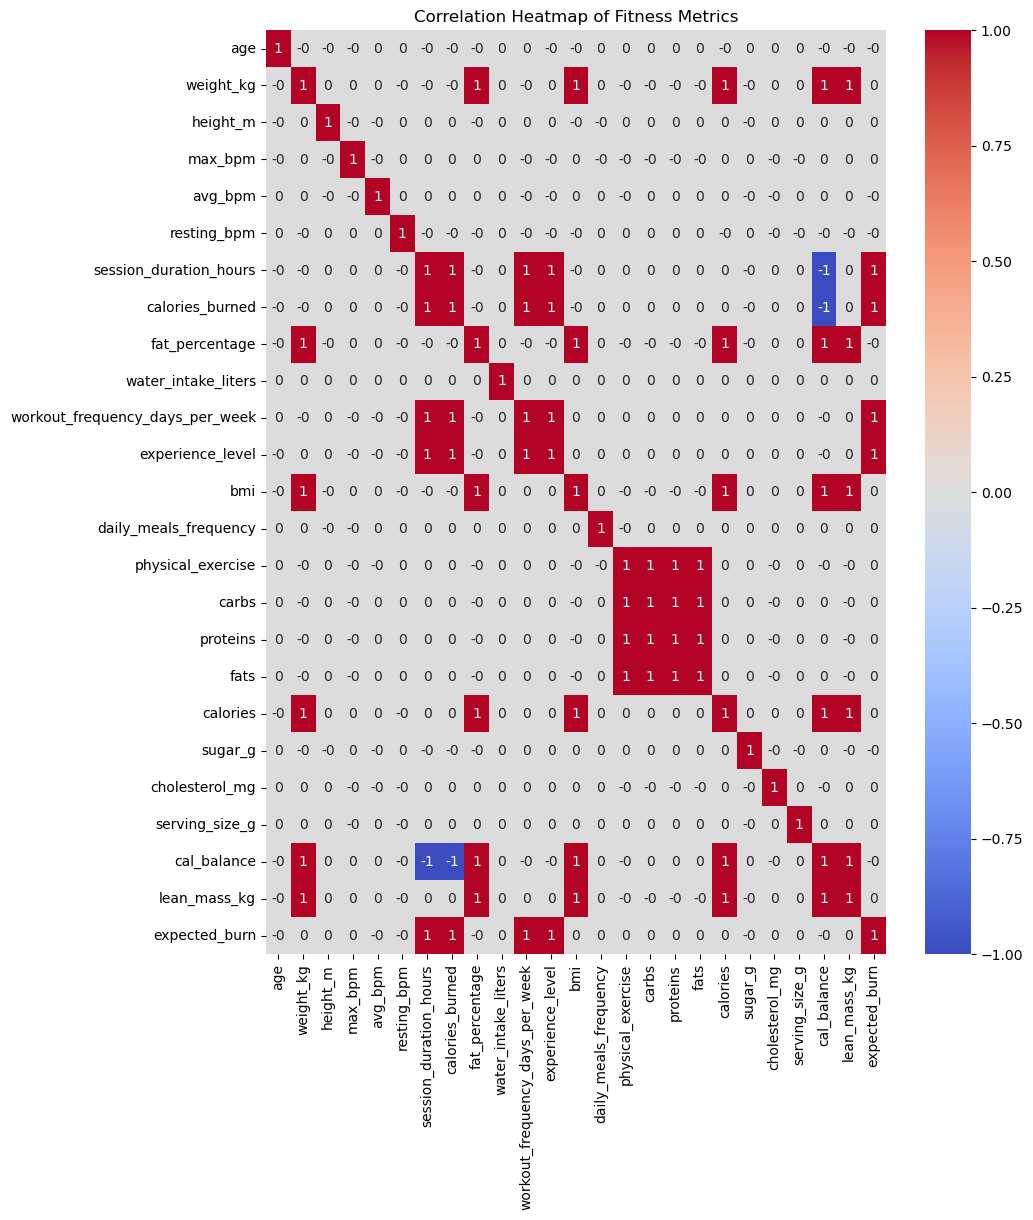

In [24]:
# Bar plot of average calories burned per workout type
plt.figure(figsize=(6,4))
sns.barplot(x='workout_type', y='calories_burned', data=df, palette='Set1')
plt.title('Average Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.show()


# Heatmap of correlations between nummeric fitness variables
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(numeric_only=True).round(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Fitness Metrics',)
plt.show()


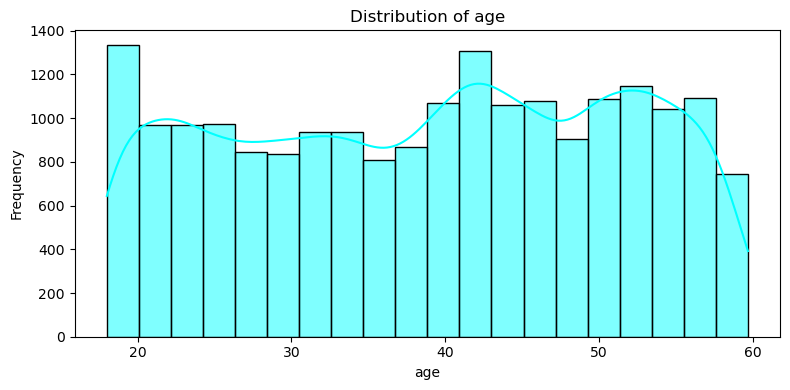

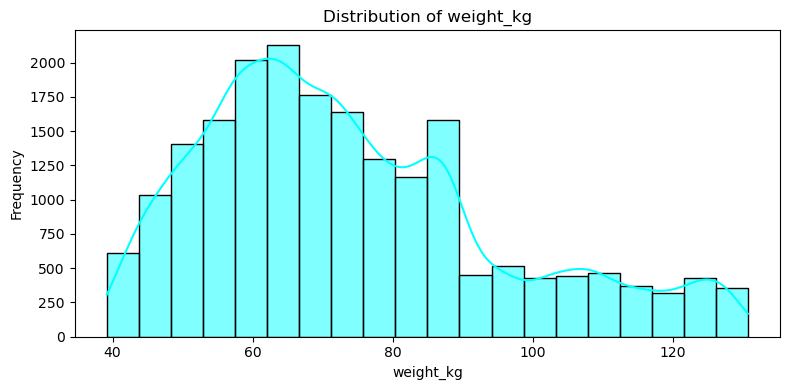

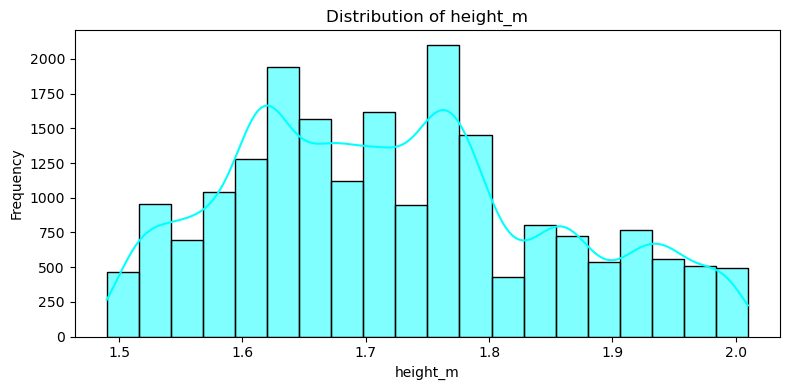

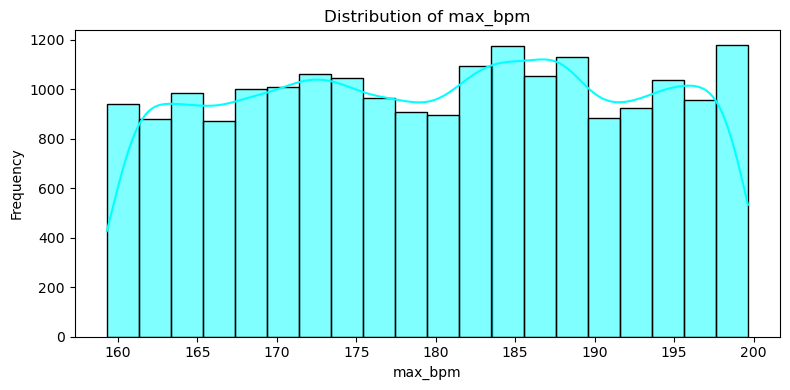

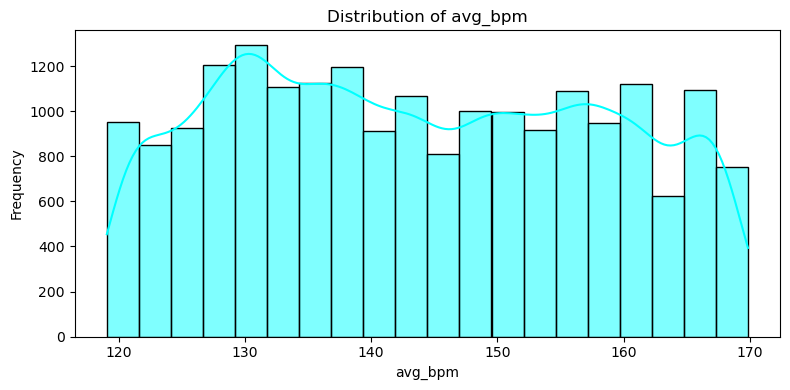

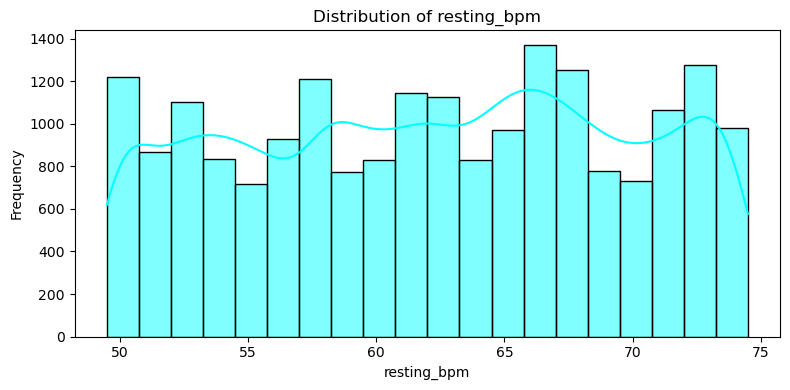

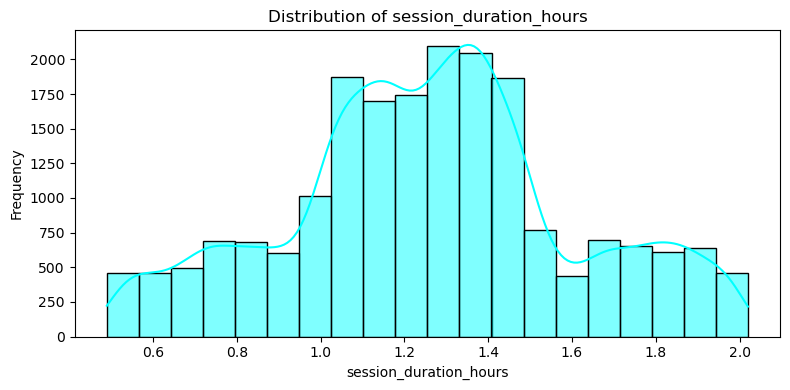

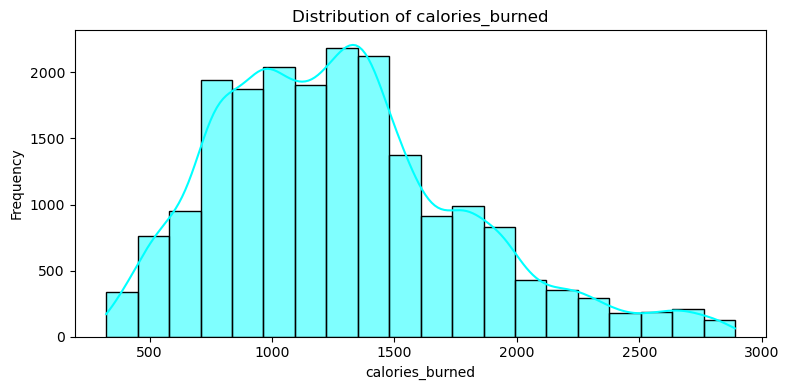

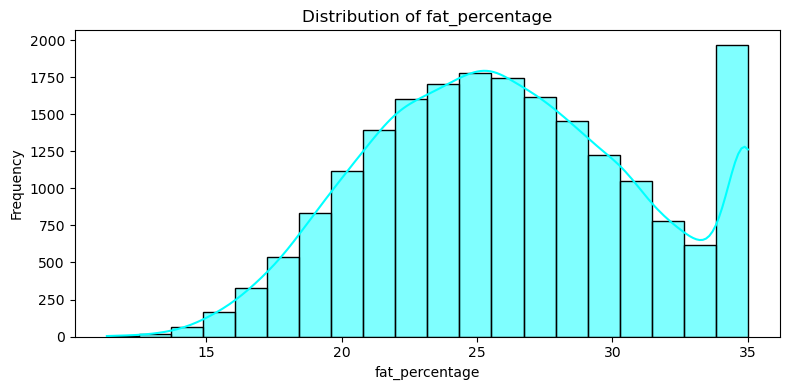

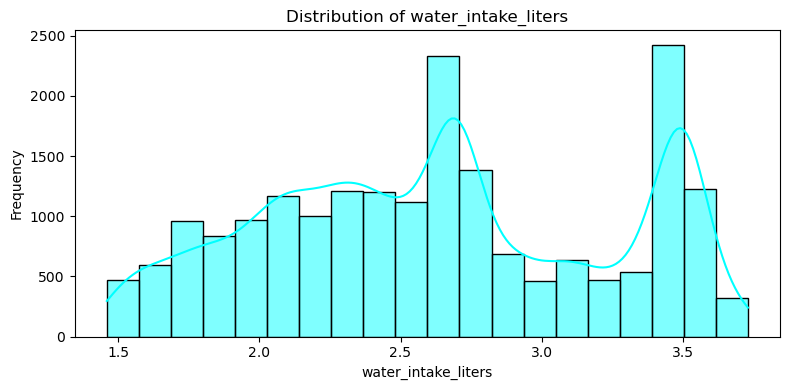

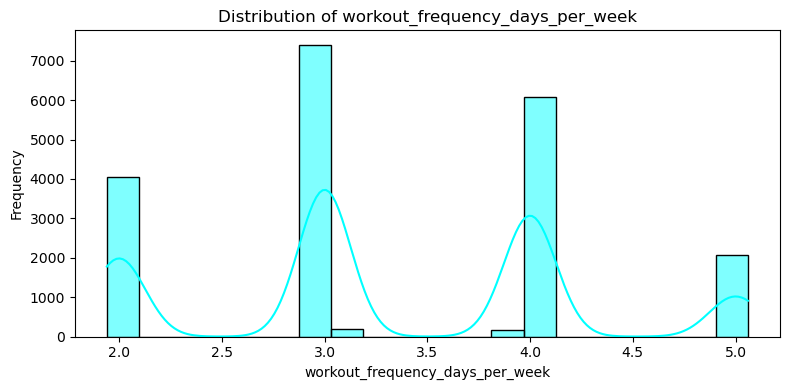

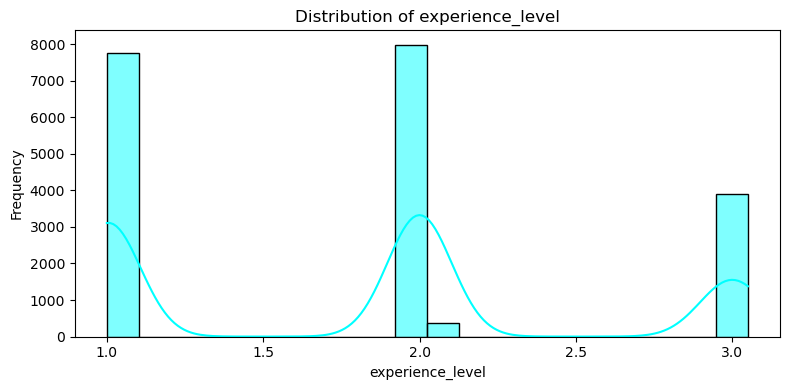

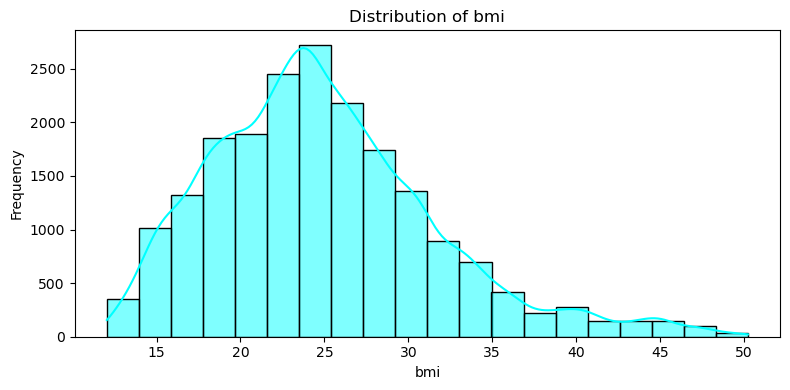

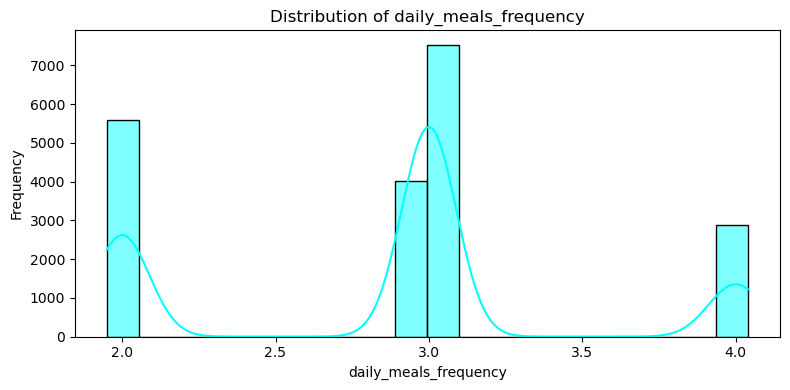

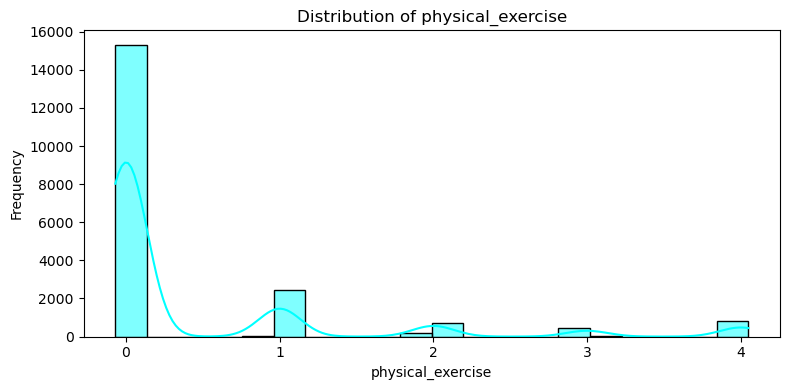

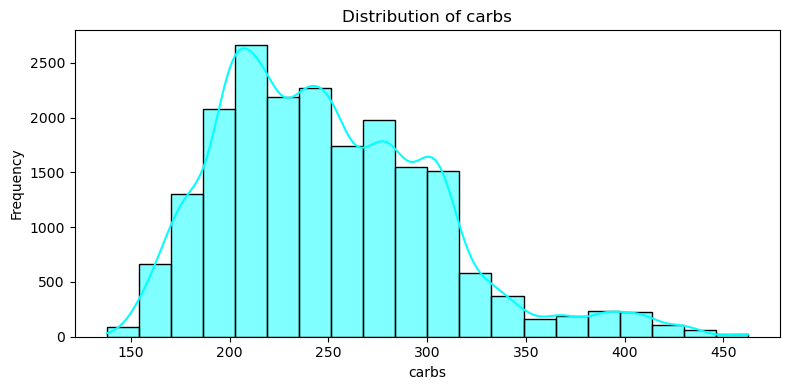

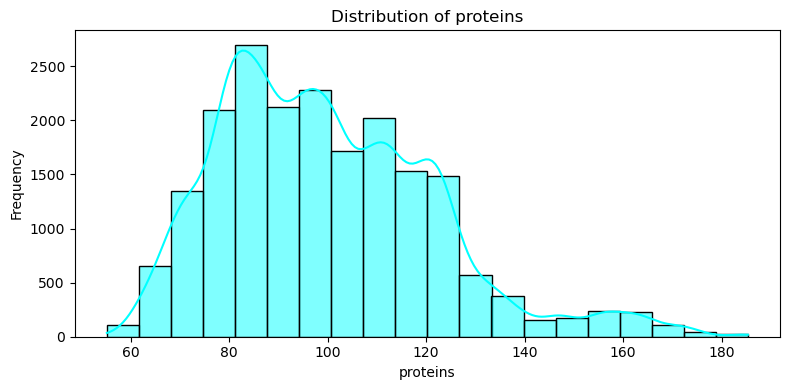

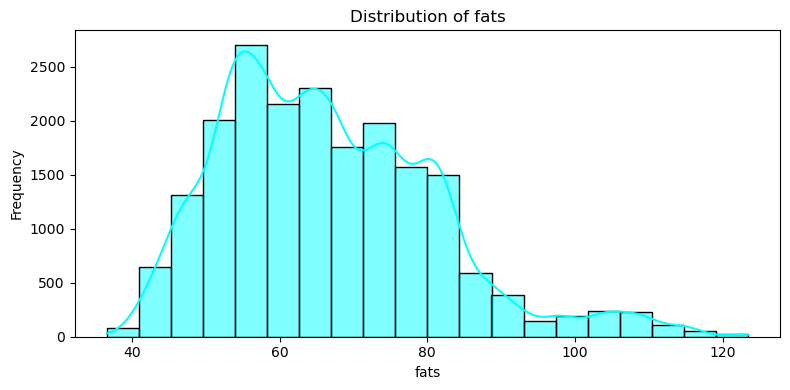

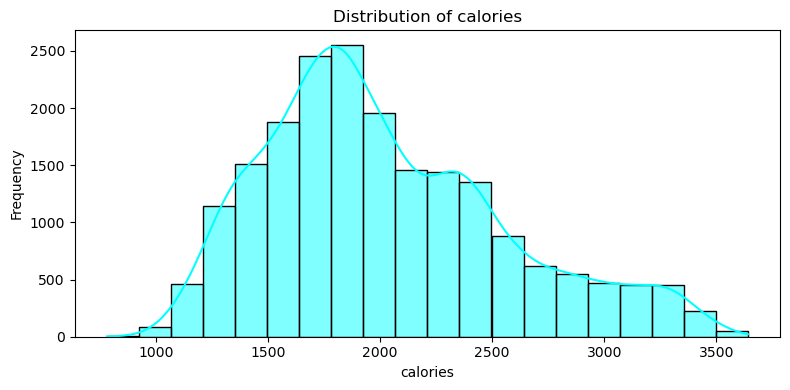

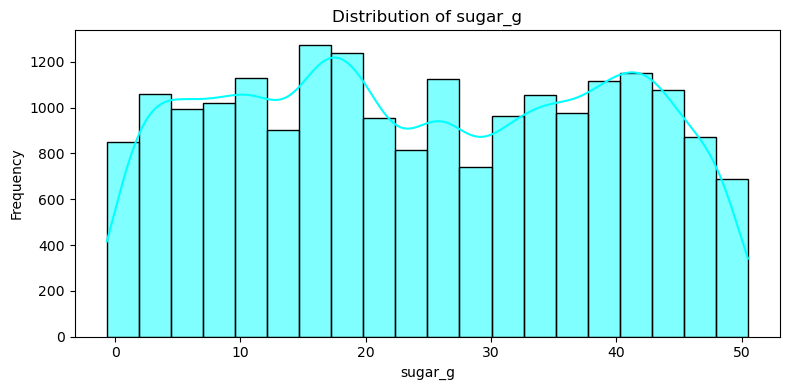

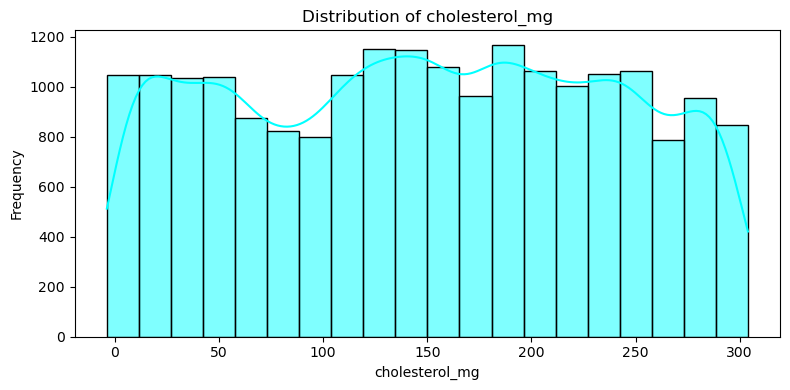

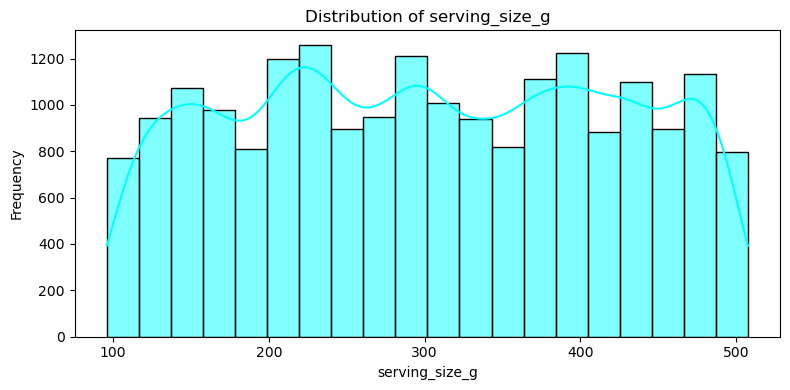

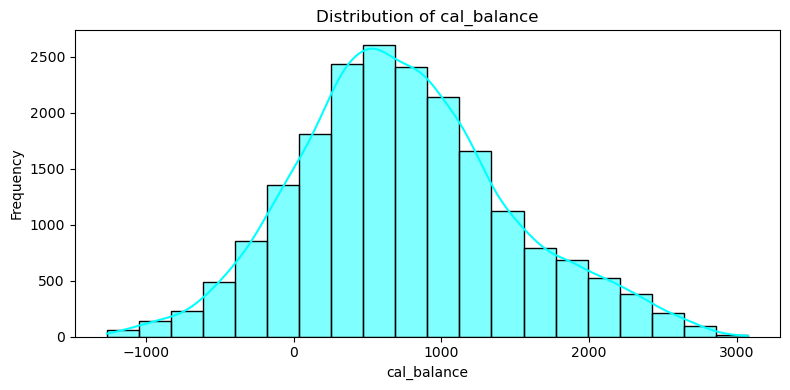

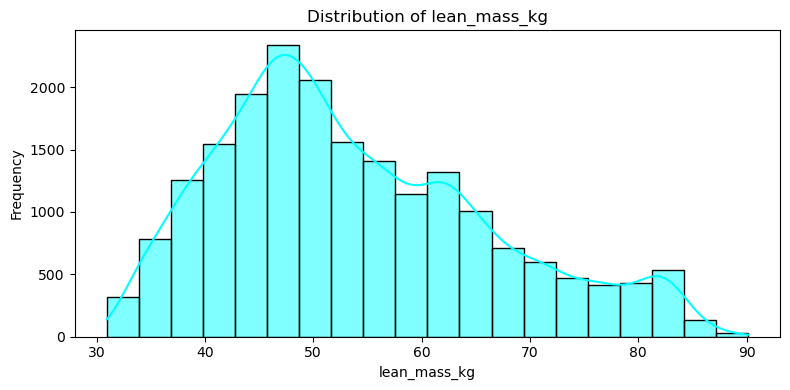

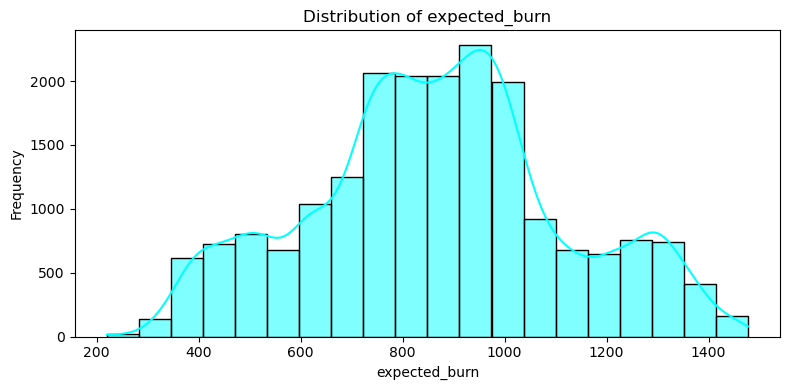

In [25]:
# Select all numeric columns from the dataset
numerical_cols = df.select_dtypes(include='number').columns

# Plot histogram for each numeric column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20, color='cyan')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


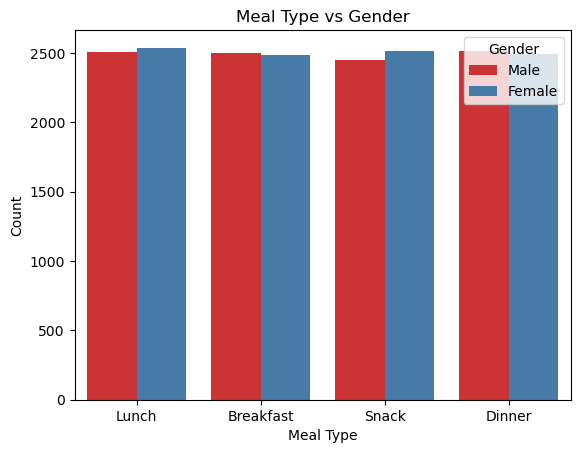

In [26]:
#Count plot
sns.countplot(data=df, x='meal_type', hue='gender',palette='Set1')
plt.title('Meal Type vs Gender')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


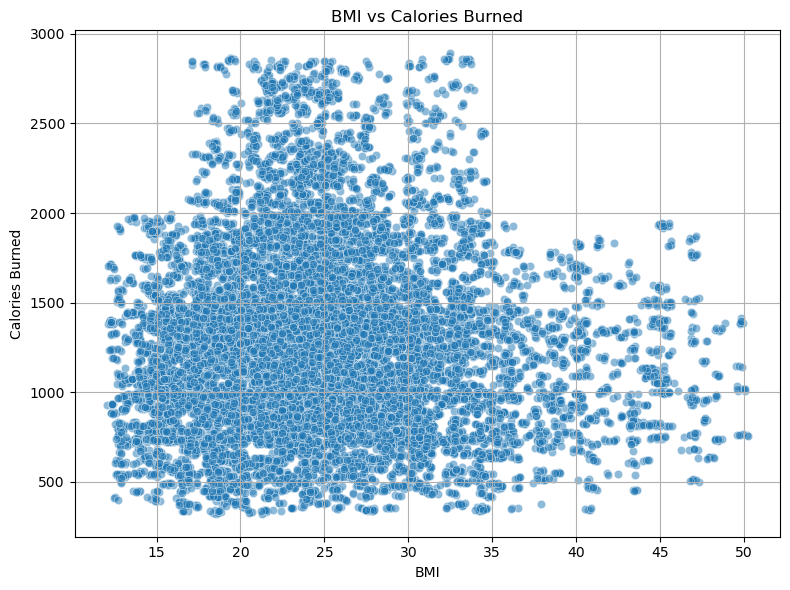

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='calories_burned', data=df, alpha=0.5)
plt.title("BMI vs Calories Burned")
plt.xlabel("BMI")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.tight_layout()
plt.show()


### Outlier Detection

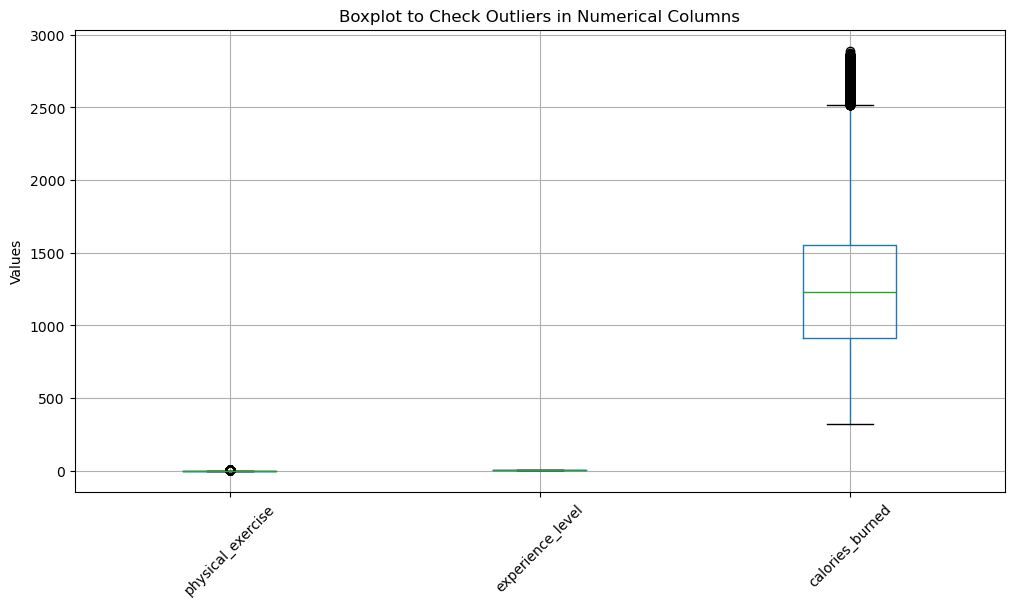

In [28]:
# Plot boxplot for checking outliers
plt.figure(figsize=(12, 6))
df.boxplot(column=['physical_exercise','experience_level','calories_burned'])
plt.title('Boxplot to Check Outliers in Numerical Columns')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.show()

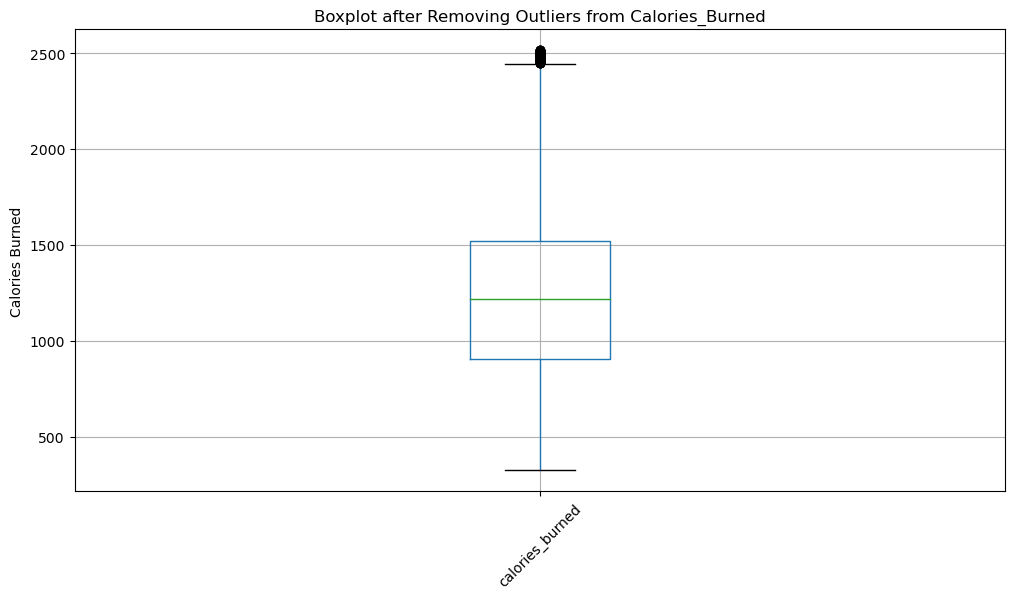

In [29]:
# Calories_Burned contains outliers, so we will remove them using the IQR method

Q1 = df['calories_burned'].quantile(0.25)
Q3 = df['calories_burned'].quantile(0.75)
IQR = Q3 - Q1

# Filter data within the IQR range
df = df[(df['calories_burned'] >= Q1 - 1.5 * IQR) & (df['calories_burned'] <= Q3 + 1.5 * IQR)]

# Plot boxplot after removing outliers
plt.figure(figsize=(12, 6))
df.boxplot(column=['calories_burned'])
plt.title('Boxplot after Removing Outliers from Calories_Burned')
plt.xticks(rotation=45)
plt.ylabel('Calories Burned')
plt.show()


### Feature Engineering

In [30]:
# 2. Create new features

# BMI sanity check
df['bmi_check'] = df['weight_kg'] / (df['height_m'] ** 2)

# Calories burned per hour
df['calories_per_hour'] = df['calories_burned'] / df['session_duration_hours']

# Protein efficiency (protein intake relative to calories)
df['protein_to_calorie_ratio'] = df['proteins'] / df['calories_burned']

# Macronutrient balance
df['carbs_to_fats_ratio'] = df['carbs'] / df['fats']

# Exercise efficiency (calories burned per workout frequency)
df['exercise_efficiency'] = df['calories_burned'] / (df['workout_frequency_days_per_week'] + 1)

# Hydration efficiency
df['hydration_per_calorie'] = df['water_intake_liters'] / df['calories_burned']

# Preview
print(df.head())


     age  gender  weight_kg  height_m  max_bpm  avg_bpm  resting_bpm  \
0  34.91    Male      65.27      1.62   188.58   157.65        69.05   
1  23.37  Female      56.41      1.55   179.43   131.75        73.18   
2  33.20  Female      58.98      1.67   175.04   123.95        54.96   
3  38.69  Female      93.78      1.70   191.21   155.10        50.07   
4  45.09    Male      52.42      1.88   193.58   152.88        70.84   

   session_duration_hours  calories_burned workout_type  ...  \
0                    1.00          1080.90     Strength  ...   
1                    1.37          1809.91         HIIT  ...   
2                    0.91           802.26       Cardio  ...   
3                    1.10          1450.79         HIIT  ...   
4                    1.08          1166.40     Strength  ...   

    name_of_exercise  cal_balance  lean_mass_kg  expected_burn  bmi_check  \
0   Decline Push-ups       725.10     47.777394       685.1600  24.870447   
1        Bear Crawls      -2

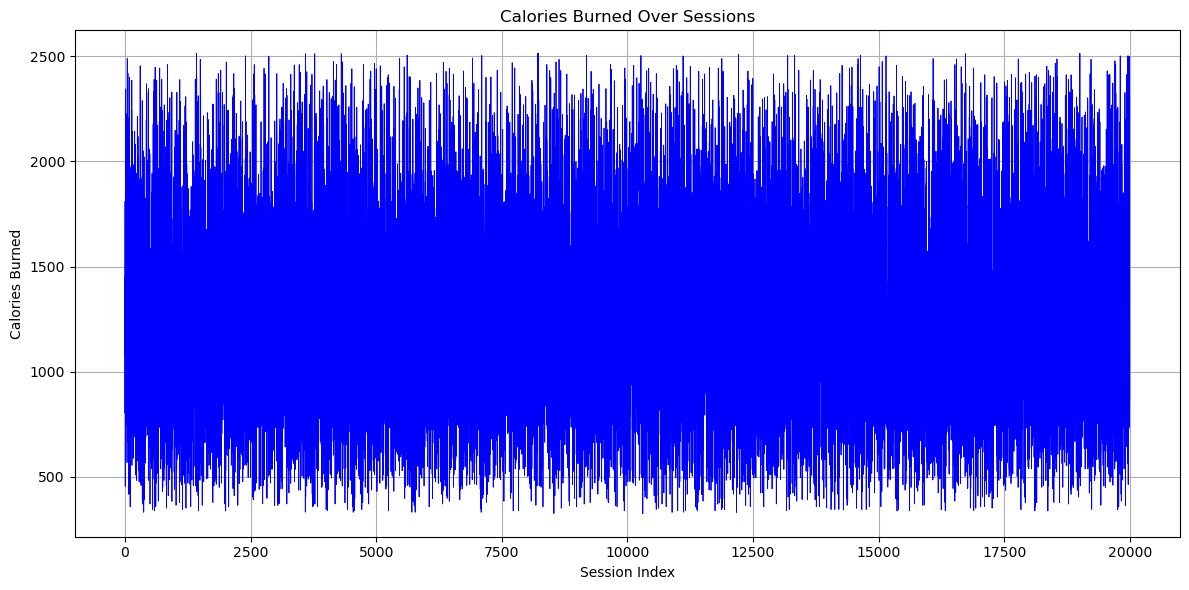

In [31]:
df_sorted = df.sort_index() 

#Plot CaloriesBurned over session order
plt.figure(figsize=(12, 6))
plt.plot(df_sorted.index, df_sorted['calories_burned'],linewidth=0.6,color='blue')
plt.title("Calories Burned Over Sessions")
plt.xlabel("Session Index")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.tight_layout()
plt.show()

SUGGESTIONS & RECOMMENDATION

1. Improve Workout Efficiency

Observation: Low Exercise_Efficiency is often linked to long session durations but relatively low CaloriesBurned.

Recommendation:

Introduce personalized workout plans targeting higher calorie burn in shorter sessions.

Monitor heart rate (AvgBPM, MaxBPM) to optimize intensity for each individual.

Reward consistent users with feedback or gamified achievements to encourage adherence.

2. Address Inconsistent Workout Patterns

Observation: Users with irregular WorkoutFrequency or low Physical exercise engagement show lower overall fitness progress.

Recommendation:

Send reminders or create structured weekly schedules to increase regularity.

Segment users by fitness level and provide tailored programs to reduce drop-offs.

Track trends over time to flag at-risk users and provide early interventions.

3. Nutrition and Hydration Insights

Observation: Poor WaterIntake or unbalanced macronutrients (Carbs/Fats/Proteins) correlate with suboptimal CalorieBurned and slower leanmasskg gains.

Recommendation:

Provide nutrition guidance based on diettype and daily meals frequency.

Use predictive models to suggest calorie or protein adjustments to meet fitness goals.

Encourage hydration tracking integrated with exercise sessions.

4. BMI and Fat Percentage Monitoring

Observation: Discrepancies between BMI, FatPercentage, and leanmasskg indicate potential misalignment between workout and diet.

Recommendation:

Use real-time tracking to adjust workout intensity or diet plans.

Deploy optimization algorithms to balance fat loss and muscle gain efficiently.

Provide feedback dashboards to users for self-monitoring and motivation.

5. Encourage Consistent Eating and Exercise Behavior

Observation: Users with irregular Daily meals frequency and low WorkoutFrequency may see slower fitness improvements.

Recommendation:

Segment users by behavior and provide targeted nudges to improve meal and exercise consistency.

Promote smaller, frequent workouts or balanced meal plans to stabilize progress.

Implement motivational campaigns or app notifications to encourage routine adherence.